In [1]:
# Task 1
# Load churn_dataset.csv

import pandas as pd

df = pd.read_csv('churn_dataset.csv')

df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
# Task 1
# What is the structure of dataset

print('# of columns: ', df.shape[1])
print('# of rows: ', df.shape[0], '\n')

print('Columns in Dataset: ')
list(df)

# of columns:  21
# of rows:  7043 

Columns in Dataset: 


['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [3]:
# Task 1
# Which column(s) have null values?

import numpy as np

# the dataset contains whitespaces instead of empty cells <-- replacing whiespaces with nunpy NaN to later identify these null values
df.replace(' ', np.nan, inplace=True)

lst_count_null_values = df.count() - len(df) # list with a count of null values for each column in the df 
lst_column_names = list(df) # list with column names in the df <-- if a column has null values then the count will be less than 0
lst_col_null_values = np.empty(shape=[0, 2], dtype=object) # list to put the columns with null values <--[column name, # of null values]

for i in range(len(lst_count_null_values)): # loop thru each column in the df and check whether it has null values
  if lst_count_null_values[i] < 0:
    lst_col_null_values = np.vstack((lst_col_null_values, np.array((lst_column_names[i], abs(lst_count_null_values[i])))))
  
print('column(s) with null values:', '\n')
for col in range(len(lst_col_null_values)):
  print(lst_col_null_values[col][0], 'with', lst_col_null_values[col][1], 'null values')

column(s) with null values: 

TotalCharges with 11 null values


In [4]:
# Task 1
# Which percentage of null values dataset has?

int_count_total_null_values = 0
for i in range(len(lst_col_null_values)):
  int_count_total_null_values += int(lst_col_null_values[i][1])
  
int_count_total_values = df.shape[1] * df.shape[0]

print('total null values in dataset:', int_count_total_null_values)
print('total size of dataset:', df.shape[1], 'columns', '*', df.shape[0], 'rows', '=', int_count_total_values, 'values')
print('percentage of null values in dataset:', '%.4f' % ((int_count_total_null_values / int_count_total_values) * 100), '%')

# print('Train Score: %.2f RMSE' % (trainScore))

total null values in dataset: 11
total size of dataset: 21 columns * 7043 rows = 147903 values
percentage of null values in dataset: 0.0074 %


In [5]:
# Task 1
# Replace null values with best candidates

# I previously replaced the whitespace values from the csv file with this command. With np.nan values I was able to find the null values.
#   df.replace(' ', np.nan, inplace=True)

print('Looking at the dataset the missing values are supposed to be 0 instead of a whitespace.')
print('I was considering replacing filling the MonthlyCharges into the TotalCharges.')
print('However, since the tenur is 0 for these records with null values, 0 for TotalCharges is a better value.')

df.replace(np.nan, 0, inplace=True) # replacing the np.nan values with 0

Looking at the dataset the missing values are supposed to be 0 instead of a whitespace.
I was considering replacing filling the MonthlyCharges into the TotalCharges.
However, since the tenur is 0 for these records with null values, 0 for TotalCharges is a better value.


In [6]:
# Task 2
# What are the correlations between input variables and target output Churn?

from sklearn import preprocessing

# To calculate the correlation for non numerical values the data needs to be factorized.

columns_original_order = list(df) # initial order of the columns
columns_2_factorize = ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', \
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'] # non numerical columns that need to be factorized
columns_not_2_factorize = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'] # numerical values that do not need to be factorized

df_factorized_temp = (df[columns_2_factorize].apply(lambda x: pd.factorize(x)[0])) # factorization of selected columns

df_factorized = pd.merge(df[columns_not_2_factorize], df_factorized_temp, left_index=True, right_index=True) # merging the non factorized and factorized dataframes

df_factorized.Churn = df_factorized.Churn.map(dict(yes=1, Yes=1, no=0, No=0)) # manually factorizing Churn to make sure we get 1 for yes/True and 0 for no/False

df_factorized = df_factorized[columns_original_order] # restoring the initial order of the columns

# Correlation calculation

df_factorized = df_factorized.drop(columns='customerID') # drop customerID as is logically cannot have an affect on the Churn
columns_df_factorized = list(df_factorized)

# Normalizing the data (even though not required for correlation it will be required for the training of the model)

x = df_factorized.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_factorized_normalized = pd.DataFrame(x_scaled, columns=columns_df_factorized)

target_output = 'Churn'

print('Pearson correlation with', target_output, ':', '\n')
for i in range(len(columns_df_factorized)-1): # go through each input variable and calculate it's correlation with the target_output
  feature = columns_df_factorized[i]
  corr = df_factorized_normalized[feature].corr(df_factorized_normalized[target_output], method='pearson')
  print(feature, corr)
  

Pearson correlation with Churn : 

gender -0.008612095078997885
SeniorCitizen 0.15088932817647324
Partner 0.15044754495917667
Dependents -0.16422140157972476
tenure -0.35222867011307796
PhoneService 0.011941980029002942
MultipleLines 0.0363104366547957
InternetService -0.04729138768314237
OnlineSecurity -0.332819191689427
OnlineBackup -0.07420530149434537
DeviceProtection -0.2814648246574705
TechSupport -0.32985226446993626
StreamingTV -0.20574215693991318
StreamingMovies -0.20725609227308128
Contract -0.396712629209844
PaperlessBilling -0.19182533166646865
PaymentMethod -0.2628182020893573
MonthlyCharges 0.19335642223784713
TotalCharges -0.1983242626039956


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
# Task 2
# What is your strategy for feature selection? (backward, forward, mixed?)

# Recursive feature elimination with cross-validation

from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFECV
from sklearn.exceptions import DataConversionWarning, ConvergenceWarning
import warnings
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

array = df_factorized_normalized.values

# convert pandas df to an array for the model
X = array[:,0:19]
Y = array[:,19]

# X = array_norm[:,0:19]
# Y = array_norm[:,19]

# Feature extraction
estimator=LinearSVC(max_iter=1000)
selector=RFECV(estimator=estimator,cv=3)
selector.fit(X,Y)

print("N_features %s"%selector.n_features_)
print("Support is %s"%selector.support_) # shows whether feature is selected
print("Ranking %s"%selector.ranking_) # ranking of features <-- only rank 1 is selected
print("Grid Scores %s"%selector.grid_scores_) # <-- correlation scores for each feature

N_features 16
Support is [False  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False]
Ranking [3 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2]
Grid Scores [0.73463012 0.78134416 0.7878743  0.78631208 0.78858472 0.79241814
 0.79568363 0.79767144 0.80093717 0.80079491 0.80377713 0.80320897
 0.80320897 0.80349308 0.80278326 0.80420291 0.80264093 0.80264093
 0.80349272]


per the Recursive feature elimination with cross-validation these are the optimal features to be selected: 

# of features to select: 16 

the selected features and their grid score: 

SeniorCitizen 0.7813441567726823
Dependents 0.786312077689522
tenure 0.788584724128595
PhoneService 0.792418136458954
MultipleLines 0.795683629130619
InternetService 0.7976714386677012
OnlineSecurity 0.8009371732904403
OnlineBackup 0.8007949060588663
DeviceProtection 0.803777134510522
TechSupport 0.8032089729007538
StreamingTV 0.8032089729007538
StreamingMovies 0.8034930839495221
Contract 0.8027832599858652
PaperlessBilling 0.8042029079131793
PaymentMethod 0.8026409322665226
MonthlyCharges 0.8026409322665226


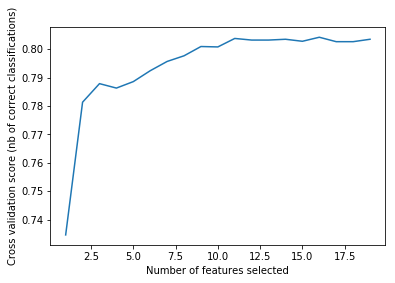

In [8]:
# Task 2
# Which features you selected and why?

  # Recursive feature elimination with cross-validation

import matplotlib.pyplot as plt

lst_feature_parameters = np.empty(shape=[0, 4], dtype=object) # list to put the columns with null values <--[column name, # of null values]
lst_column_names = list(df_factorized_normalized)
lst_features_2_use = []

for i in range(len(lst_column_names)-1): # loop thru each column in the df and check whether it has null values
    # add to the numpy array: feature, whether it's included, rank, grid score
    lst_feature_parameters = np.vstack((lst_feature_parameters, np.array((lst_column_names[i], selector.support_[i], selector.ranking_[i], selector.grid_scores_[i])))) 

print('per the Recursive feature elimination with cross-validation these are the optimal features to be selected:', '\n')
print('# of features to select:', selector.n_features_, '\n')

print('the selected features and their grid score:', '\n') 
for i in range(len(lst_feature_parameters)): # print all the features that are selected (True)
  if lst_feature_parameters[i][1] == 'True':
    print(lst_feature_parameters[i][0], lst_feature_parameters[i][3])
    lst_features_2_use.append(lst_feature_parameters[i][0])
     

# Plot showing the the # of features compared grid scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()

In [ ]:
# Task 2
# Which features you selected and why?

# Another way to select the best features. For this method the optimal number of features has to be found by finetuning.
# However, I used this method to compare my optimal features from the previous technique of Recursive feature elimination with cross-validation. 

## Recursive Feature Elimination

# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression

# array = df_factorized_normalized.values
  
# X = array[:,0:19]
# Y = array[:,19]

# # Feature extraction
# model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000) #changed
# rfe = RFE(model, 12)
# fit = rfe.fit(X, Y)

# print("Num Features: %s" % (fit.n_features_))
# print("Selected Features: %s" % (fit.support_))
# print("Feature Ranking: %s" % (fit.ranking_))
# print(fit)

In [10]:
# Task 3
# Build, train and evaluate a classifier model
# Model 1
  # Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

# Create Train & Test Data
array = df_factorized_normalized[lst_features_2_use + [target_output]].values
X = array[:,0:16]
Y = array[:,16]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) # CHANGE what is random state

# train the model
model = LogisticRegression(solver='lbfgs')
result = model.fit(X_train, Y_train)
prediction_test = model.predict(X_test)

# Calculate the metric scores

accuracy_log_regr = accuracy_score(Y_test, prediction_test) # <-- tp / (tp + fn)
recall_log_regr = recall_score(Y_test, prediction_test) # <-- tp / (tp + fn)
precision_log_regr = precision_score(Y_test, prediction_test) # <-- tp / (tp + fp)
f1_log_regr = f1_score(Y_test, prediction_test) # <-- F1 = 2 * (precision * recall) / (precision + recall)

print('Metric scores of logistic regression model:', '\n')
print('Accuracy:', accuracy_log_regr)
print('Recall:', recall_log_regr)
print('Precision:', precision_log_regr)
print('F1 Score:', f1_log_regr)

Metric scores of logistic regression model: 

Accuracy: 0.7963094393186657
Recall: 0.5135869565217391
Precision: 0.6363636363636364
F1 Score: 0.5684210526315789


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 5634 samples, validate on 1409 samples
Epoch 1/15
5634/5634 [==============================] - 3s 535us/step - loss: 0.5115 - acc: 0.7533 - val_loss: 0.4500 - val_acc: 0.7722
Epoch 2/15
5634/5634 [==============================] - 2s 338us/step - loss: 0.4271 - acc: 0.8000 - val_loss: 0.4460 - val_acc: 0.7935
Epoch 3/15
5634/5634 [==============================] - 2s 339us/step - loss: 0.4215 - acc: 0.8042 - val_loss: 0.4449 - val_acc: 0.7913
Epoch 4/15
5634/5634 [==============================] - 2s 335us/step - loss: 0.4192 - acc: 0.8026 - val_loss: 0.4421 - val_acc: 0.7935
Epoch 5/15
5634/5634 [==============================] - 2s 335us/step - loss: 0.4170 - acc: 0.8033 - val_loss: 0.4420 - val_acc: 0.7963
Epoch 6/15
5634/5634 [==============================] - 2s 333us/step - loss: 0.4164 - acc: 0.8028 - val_loss: 0.4400 - val_acc: 0.8013
Epoch 7/15
5634/

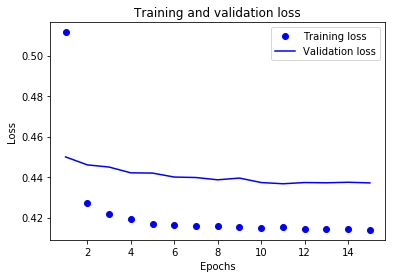

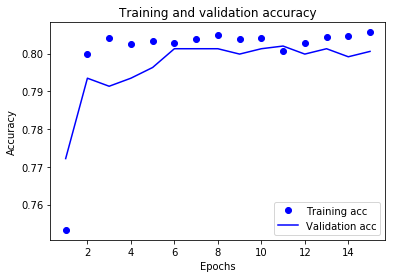

In [11]:
# Task 3
# Build, train and evaluate a classifier model
# Model 2

  # Artificial Neural Network

from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import matplotlib.pyplot as plt

# Create Train & Test Data
array = df_factorized_normalized[lst_features_2_use + [target_output]].values
X = array[:,0:16]
Y = array[:,16]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) # CHANGE what is random state

# Build the neural network model

classifier = Sequential()

# Input Layer
classifier.add(Dense(activation="relu", input_dim=selector.n_features_, units=8, kernel_initializer="uniform")) # output_dim  <-- (16+1)/2==>8 So set Output Dim=6

# second hidden layer
classifier.add(Dense(activation="relu", units=8, kernel_initializer="uniform"))

# output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform")) # Sigmoid activation function is for Probabilities of 2 categories or less <-- otherwise softmax

# Optimizer
# sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) # did not result in better results

# compiling
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# classifier.compile(loss='mean_squared_error', optimizer=sgd) # did not result in better results

# Run the model
# classifier.fit(X_train, Y_train, batch_size = 10, nb_epoch = 10)
history = classifier.fit(X_train, Y_train, batch_size=10, epochs=15, validation_data=(X_test, Y_test))

# Evaluate
loss, accuracy = classifier.evaluate(X_test, Y_test, verbose=0)

# Calculate the metric scores
testPredict = classifier.predict(X_test)
int_testPredict = np.around(testPredict)

accuracy_ann = accuracy_score(Y_test, int_testPredict) # <-- tp / (tp + fn)
recall_ann = recall_score(Y_test, int_testPredict) # <-- tp / (tp + fn)
precision_ann = precision_score(Y_test, int_testPredict) # <-- tp / (tp + fp)
f1_ann = f1_score(Y_test, int_testPredict) # <-- F1 = 2 * (precision * recall) / (precision + recall)

print('Metric scores of artificial neural network model:', '\n')
print('Loss:', loss)
print('Accuracy:', accuracy_ann)
print('Recall:', recall_ann)
print('Precision:', precision_ann)
print('F1 Score:', f1_ann)

# Progression of the loss and accuracy with each epoch

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
# Task 3
# Explain why you have selected that specific model

print('I wanted to compare the the performance of two recommended models for Churn analysis (based on online research):')
print('logistic regression and an articifial neural network.', '\n')

print('Looking at the metric scores of each model, the logistic regression model performs just slightly better.')
print('However, to make a recommandation as to which to use, more tweaking and fine tuning of each model would be ncessesary.', '\n')

print('Metric scores of artificial neural network model:', '\n')
print('Accuracy:', accuracy_ann)
print('Recall:', recall_ann)
print('Precision:', precision_ann)
print('F1 Score:', f1_ann, '\n')

print('Metric scores of logistic regression model:', '\n')
print('Accuracy:', accuracy_log_regr)
print('Recall:', recall_log_regr)
print('Precision:', precision_log_regr)
print('F1 Score:', f1_log_regr)


I wanted to compare the the performance of two recommended models for Churn analysis (based on online research):
logistic regression and an articifial neural network. 

Looking at the metric scores of each model, the logistic regression model performs just slightly better.
However, to make a recommandation as to which to use, more tweaking and fine tuning of each model would be ncessesary. 

Metric scores of artificial neural network model: 

Accuracy: 0.8005677785663591
Recall: 0.5163043478260869
Precision: 0.6484641638225256
F1 Score: 0.5748865355521937 

Metric scores of logistic regression model: 

Accuracy: 0.7963094393186657
Recall: 0.5135869565217391
Precision: 0.6363636363636364
F1 Score: 0.5684210526315789
